ahmadFajarrizkyfirdaus@gmail.com

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
Dataset = pd.read_csv("/content/drive/MyDrive/Case Study Data Scientist/AllData.csv")
Dataset.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"


# kmeans

In [ ]:
# Agregasi data pelanggan
customer_data = Dataset.groupby('CustomerID').agg({
    'TransactionID': 'count',  # Jumlah transaksi
    'Qty': 'sum',              # Total kuantitas yang dibeli
    'TotalAmount': 'sum'       # Total jumlah pembelian
}).reset_index()

In [ ]:
# Pemilihan fitur untuk clustering
X = customer_data[['TransactionID', 'Qty', 'TotalAmount']]

In [ ]:
# Normalisasi data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Menentukan jumlah cluster (gunakan metode Elbow)
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

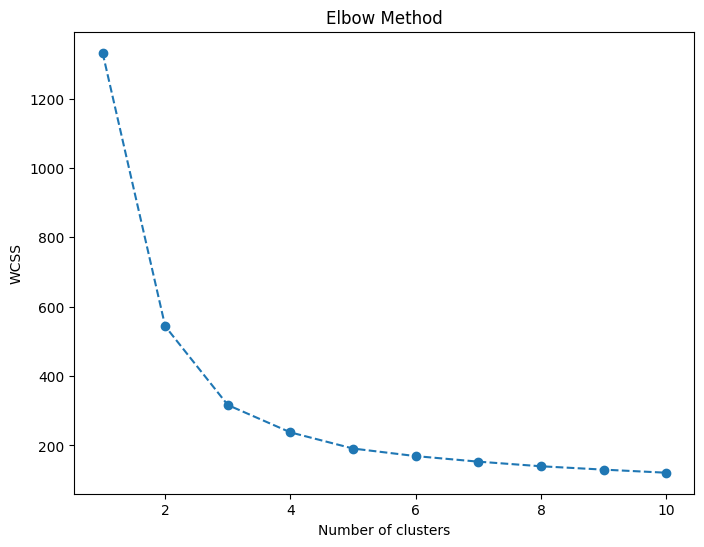

In [ ]:
# Plot Elbow Method untuk menentukan jumlah cluster yang optimal
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Pilih jumlah cluster yang optimal berdasarkan plot Elbow
n_clusters = 4  # Ganti dengan jumlah cluster

In [ ]:
# Menerapkan algoritma K-Means dengan jumlah cluster yang telah dipilih
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# Menampilkan hasil clustering
print(customer_data)

     CustomerID  TransactionID  Qty  TotalAmount  Cluster
0             1             17   60       623300        3
1             2             13   57       392300        2
2             3             15   56       446200        2
3             4             10   46       302500        0
4             5              7   27       268600        1
..          ...            ...  ...          ...      ...
439         442             13   37       269400        0
440         444             18   62       577700        3
441         445             18   68       587200        3
442         446             11   42       423300        0
443         447             13   42       439300        2

[444 rows x 5 columns]


# Marge Data
guna analisis lanjutan

In [ ]:
merged_dataset = Dataset.merge(customer_data[['CustomerID', 'Cluster']], on='CustomerID', how='left')
merged_dataset

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude,Cluster
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",0
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",0
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",0
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",0
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4971,TR69555,221,2022-01-08,P4,12000,3,36000,4,23,1,Single,7.50,Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",0
4972,TR21587,425,2022-10-17,P4,12000,1,12000,4,58,1,Married,7.22,Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",1
4973,TR51183,409,2022-07-19,P4,12000,1,12000,4,47,0,Married,28.23,Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",2
4974,TR14963,374,2022-12-16,P4,12000,5,60000,4,32,0,Single,5.40,Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",2


 Plot scatter plot berdasarkan dua fitur ('Age' dan 'Income') dan beri warna berdasarkan cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_dataset, x='Age', y='Income', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering')

 Tambahkan centroid cluster ke plot
centroids = kmeans.cluster_centers_
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], hue=range(n_clusters), palette='viridis', s=200, marker='x', label='Centroids')

plt.show()

In [ ]:
# Group the merged dataset by 'Cluster'
cluster_groups = merged_dataset.groupby('Cluster')

# Calculate summary statistics for each cluster
cluster_stats = cluster_groups[['Age', 'Income']].describe()

# Print the statistics for each cluster
for cluster, data in cluster_stats.iterrows():
    print(f"Cluster {cluster} statistics:")
    print(data)
    print("\n")

Cluster 0 statistics:
Age     count    1877.000000
        mean       40.444859
        std        12.667882
        min         0.000000
        25%        31.000000
        50%        40.000000
        75%        51.000000
        max        72.000000
Income  count    1877.000000
        mean        8.542952
        std         6.181524
        min         0.000000
        25%         4.060000
        50%         7.500000
        75%        10.910000
        max        35.780000
Name: 0, dtype: float64


Cluster 1 statistics:
Age     count    653.000000
        mean      39.753446
        std       13.613041
        min        3.000000
        25%       30.000000
        50%       39.000000
        75%       51.000000
        max       70.000000
Income  count    653.000000
        mean       8.913078
        std        8.552196
        min        0.000000
        25%        3.860000
        50%        7.220000
        75%       12.250000
        max       71.300000
Name: 1, dtype: fl

In [ ]:
# Visualize cluster characteristics
fig = px.scatter(merged_dataset, x='Age', y='Income', color='Cluster', title='Cluster Characteristics')
fig.show()


Berdasarkan statistik ringkasan diatas, saya dapat menyimpulkan karakteristik dari masing-masing cluster sebagai berikut:

**Cluster 0:**

Rata-rata usia sekitar 40 tahun dengan variasi yang cukup rendah.
Rata-rata pendapatan sekitar 8.54 dengan variasi yang sedang.
Rentang usia dari 0 hingga 72 tahun.
Rentang pendapatan dari 0 hingga 35.78.

**Cluster 1:**

Rata-rata usia sekitar 39.75 tahun dengan variasi yang cukup rendah.
Rata-rata pendapatan sekitar 8.91 dengan variasi yang cukup tinggi.
Rentang usia dari 3 hingga 70 tahun.
Rentang pendapatan dari 0 hingga 71.3.

**Cluster 2:**

Rata-rata usia sekitar 39.84 tahun dengan variasi yang sedang.
Rata-rata pendapatan sekitar 8.99 dengan variasi yang sedang.
Rentang usia dari 18 hingga 68 tahun.
Rentang pendapatan dari 0 hingga 54.2.

**Cluster 3**:

Rata-rata usia sekitar 39.96 tahun dengan variasi yang cukup tinggi.
Rata-rata pendapatan sekitar 8.11 dengan variasi yang sedang.
Rentang usia dari 2 hingga 61 tahun.
Rentang pendapatan dari 0 hingga 20.81.

Dari statistik di atas, kita dapat melihat perbedaan karakteristik antara cluster-cluster. Cluster 1 memiliki variasi pendapatan yang tinggi, sementara Cluster 0 memiliki variasi pendapatan yang lebih rendah. Cluster 3 memiliki variasi usia yang tinggi dan pendapatan yang lebih rendah. Cluster 2 memiliki usia yang lebih tinggi dan pendapatan sedang.

Dengan informasi ini, kita dapat memahami karakteristik masing-masing cluster dan mengambil tindakan yang sesuai, seperti menyesuaikan strategi pemasaran atau segmentasi pelanggan.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

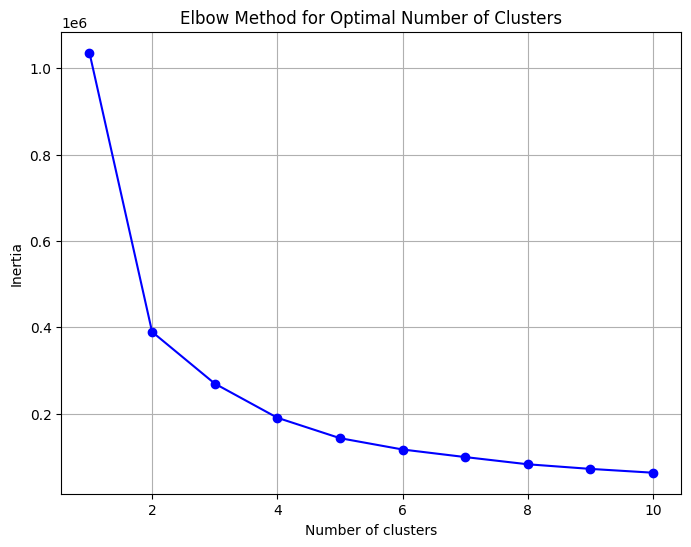

In [ ]:
# Pilih fitur yang ingin Anda gunakan untuk clustering (misalnya 'Age' dan 'Income')
X = merged_dataset[['Age', 'Income']]

# Menghitung inertia untuk berbagai jumlah cluster
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid()
plt.show()

ada perbedaan dalam pendekatan dan pemahaman keduanya:

**Elbow Method:**

Elbow Method adalah pendekatan visual yang bergantung pada "inertia" atau "within-cluster sum of squares" sebagai metriknya.
Dalam Elbow Method, Anda menghitung inertia (nilai yang lebih rendah menunjukkan bahwa pusat-pusat cluster lebih dekat dengan anggota-anggotanya) untuk berbagai jumlah cluster yang berbeda.
Kemudian, Anda membuat grafik jumlah cluster terhadap inertia dan mencari titik "elbow" di mana penurunan inertia berkurang secara signifikan. Pada titik ini, Anda menganggap jumlah cluster tersebut sebagai jumlah cluster optimal.
Elbow Method adalah pendekatan yang sederhana dan berguna untuk menentukan jumlah cluster secara kasar.


**Validasi Cluster:**

Validasi cluster adalah pendekatan yang lebih komprehensif yang melibatkan metrik-metrik seperti Silhouette Score, Dunn Index, atau Calinski-Harabasz Index, serta pemahaman yang lebih dalam tentang karakteristik data.
Metrik-metrik ini membantu Anda mengukur kualitas dan sebaran cluster, dan mengidentifikasi apakah cluster yang terbentuk secara alami dan memiliki arti yang jelas.
Validasi cluster memeriksa lebih lanjut apakah jumlah cluster yang terpilih melalui metode visual seperti Elbow Method benar-benar cocok dengan struktur data. Validasi ini membantu mencegah overfitting atau underfitting cluster.
Validasi cluster lebih sesuai untuk kasus di mana kualitas cluster menjadi faktor yang lebih penting daripada hanya menentukan jumlah cluster.
Sebagai tambahan, penting untuk memahami bahwa hasil dari metode Elbow Method tergantung pada inisialisasi acak dari centroid, dan mungkin perlu beberapa iterasi untuk menemukan titik "elbow" yang konsisten. Hasil validasi cluster berusaha untuk memberikan pemahaman yang lebih mendalam tentang cluster-cluster yang terbentuk. Jika hasil dari Elbow Method dan validasi cluster Anda mirip, maka Anda mungkin telah menemukan jumlah cluster yang sesuai untuk dataset Anda.